<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w5_d5_Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-project
# Introduction
You will apply the concepts learned in previous lessons to complete two hands-on projects: one involving image classification and the other focusing on text classification. These projects will help you solidify your understanding of preprocessing data, building and training neural networks, and evaluating model performance. By the end of the day, you will have created two functional models and gained practical experience in handling real-world datasets.



#  What You’ll learn
Daily Challenge: Image Classification with Data Augmentation (Cats vs Dogs)
How to preprocess image data for a convolutional neural network (CNN).
How to apply data augmentation techniques to improve model generalization.
How to build and train a CNN for binary image classification.
How to use dropout to reduce overfitting in a neural network.


# Mini-Project: Binary Text Classification with IMDB Dataset (CNN)
How to preprocess text data for neural networks.
How to build and train a simple feedforward neural network for binary classification.
How to evaluate the performance of a model using validation and test data.
How to visualize training and validation metrics to detect overfitting.


# What you will create
* Daily Challenge: Image Classification with Data Augmentation (Cats vs Dogs)
A binary image classification model to distinguish between images of cats and dogs.
A visualization of training and validation metrics to analyze model performance.


* Mini-Project: Binary Text Classification with IMDB Dataset (CNN)
A binary text classification model using the IMDB dataset to classify movie reviews as positive or negative.
A visualization of training and validation loss and accuracy to analyze model performance.


In [6]:
import os, zipfile, tensorflow as tf

# Download the original archive
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url)

# Extract manually in /content to be sure that the folder exist
extract_path = "/content/cats_and_dogs_filtered"
if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("/content")

# check the structure
train_dir = os.path.join(extract_path, "train")
validation_dir = os.path.join(extract_path, "validation")

print("Train dir:", train_dir)
print("Validation dir:", validation_dir)
print("Subfolders in train:", os.listdir(train_dir))


Train dir: /content/cats_and_dogs_filtered/train
Validation dir: /content/cats_and_dogs_filtered/validation
Subfolders in train: ['dogs', 'cats']


In [28]:
# step 1 - Load & Preprocess the Cats vs Dogs dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [29]:
# step 2 – Data Augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for the train set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,       # rotiri aleatoare
    width_shift_range=0.2,   # deplasare pe orizontală
    height_shift_range=0.2,  # deplasare pe verticală
    shear_range=0.2,         # deformare tip “shear”
    zoom_range=0.2,          # zoom aleator
    horizontal_flip=True,    # întoarcere stânga-dreapta
    fill_mode='nearest'      # completare a zonelor lipsă
)

# for validation we use only rescale without augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# new generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

print(" Data augmentation applied and generators ready!")


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
 Data augmentation applied and generators ready!


In [30]:
from tensorflow.keras import layers, models

# 3. Define the CNN Model
model = models.Sequential([
    # Bloc 1: feature extraction
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    # Bloc 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Bloc 3
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Regularizare
    layers.Dropout(0.3),

    # Flatten + straturi dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

# Compilare model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# step 4 - Train the Model
EPOCHS = 5

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

print("Training complete!")


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5156 - loss: 0.7093 - val_accuracy: 0.5160 - val_loss: 0.6906
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5296 - loss: 0.6914 - val_accuracy: 0.5060 - val_loss: 0.6882
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4975 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6865
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5291 - loss: 0.6930 - val_accuracy: 0.5430 - val_loss: 0.6836
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5244 - loss: 0.6907 - val_accuracy: 0.5840 - val_loss: 0.6758
Training complete!


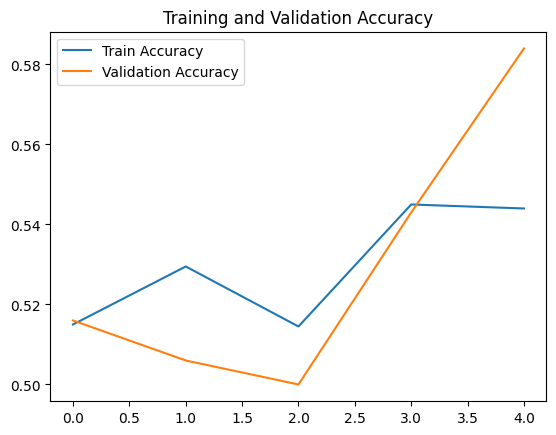

In [32]:
# visualisation of the results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [33]:
# step 5 - Evaluate the Model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 308ms/step - accuracy: 0.5824 - loss: 0.6818
Validation Accuracy: 0.5840
Validation Loss: 0.6758


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


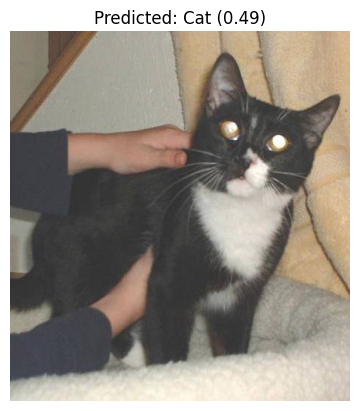

In [15]:
# test some images
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# choose one image for test
img_path = validation_generator.filepaths[0]  # choose first image from validation
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)[0][0]
label = "Dog" if prediction > 0.5 else "Cat"

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {label} ({prediction:.2f})")
plt.axis("off")
plt.show()


 Model saved as 'cats_vs_dogs_cnn.h5'


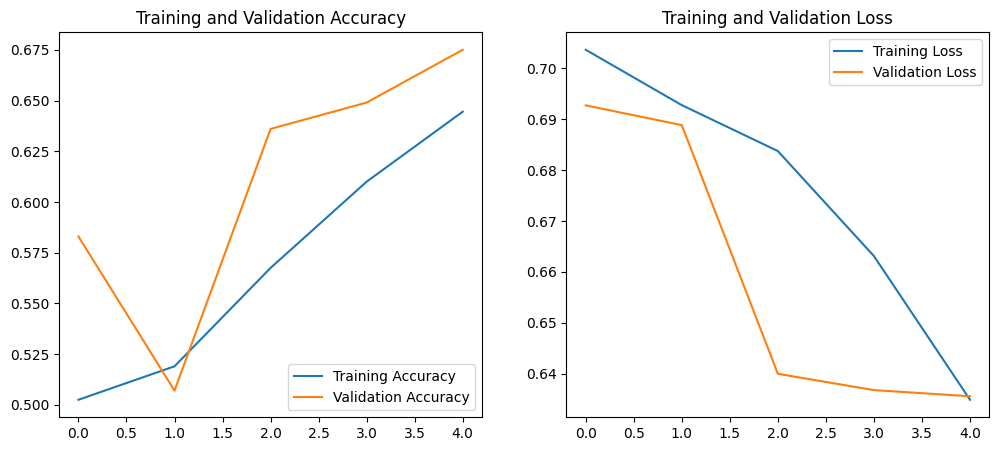

In [16]:
# 6. Save the Model & Visualize Final Results
import matplotlib.pyplot as plt

# Save the trained model
model.save("cats_vs_dogs_cnn.h5")
print(" Model saved as 'cats_vs_dogs_cnn.h5'")

# visualise acuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


In [18]:
# DOGS
# 1) Load & Preprocess (IMDB)
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Basic settings
VOCAB  = 10000   # keep the most frequent 10k words
MAXLEN = 200     # sequence length after padding

# Load
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=VOCAB)

# Padding for the same length
X_train = pad_sequences(X_train, maxlen=MAXLEN)
X_test  = pad_sequences(X_test,  maxlen=MAXLEN)

# Split from train for validation (80/20)
val_size = int(0.2 * len(X_train))
X_val, y_val     = X_train[:val_size], y_train[:val_size]
X_train_, y_train_ = X_train[val_size:], y_train[val_size:]

print("Train:", X_train_.shape, "Val:", X_val.shape, "Test:", X_test.shape)


Train: (20000, 200) Val: (5000, 200) Test: (25000, 200)


In [19]:
# 2) Define the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=200),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 3) Train the Model
EPOCHS = 3
BATCH  = 128

history = model.fit(
    X_train_, y_train_,
    epochs=EPOCHS,
    batch_size=BATCH,
    validation_data=(X_val, y_val),
    verbose=1
)

print("Training complete!")


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 31s 195ms/step - accuracy: 0.9480 - loss: 0.1626 - val_accuracy: 0.8682 - val_loss: 0.3202
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 30s 193ms/step - accuracy: 0.9706 - loss: 0.1029 - val_accuracy: 0.8664 - val_loss: 0.3469
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 180ms/step - accuracy: 0.9857 - loss: 0.0615 - val_accuracy: 0.8656 - val_loss: 0.3837
Training complete!


In [22]:
# 4) Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Test accuracy: 0.8690
Test loss: 0.3069


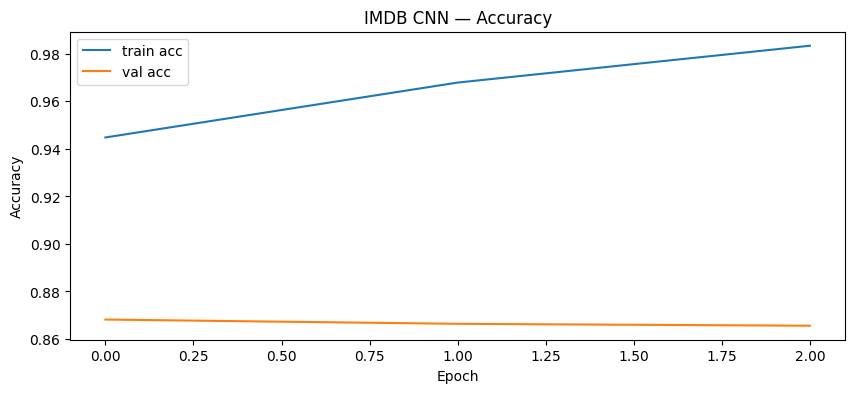

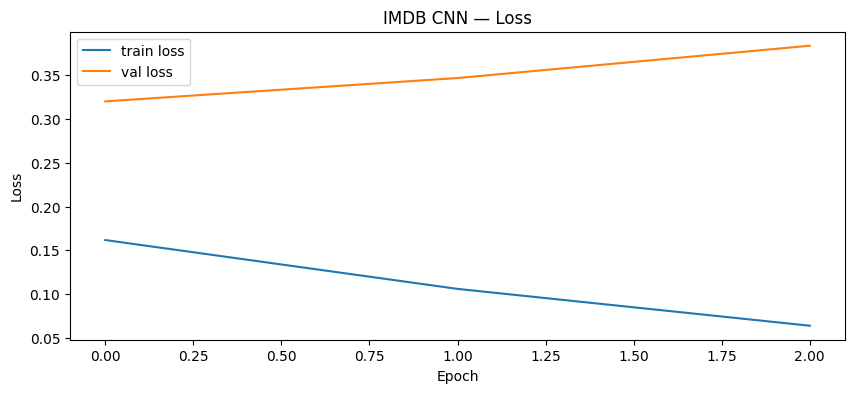

In [24]:
# Training curves: accuracy & loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('IMDB CNN — Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.show()

plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('IMDB CNN — Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.show()


In [25]:
# Salve model for re-use
model.save("imdb_cnn.h5")
print("Model saved as 'imdb_cnn.h5'")


Model saved as 'imdb_cnn.h5'
